<a href="https://colab.research.google.com/github/ChristianBridge/Christian_INFO5731_SPRING2025/blob/main/INFO5731_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

##Load Dataset

The dataset I chose was provided by Kaggle (https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis), I chose this dataset because it had labeled sentiments and a wide variety of entities (topics).

In [2]:
#Create dataframe columns
twitter_columns = ['id','entity','sentiment','content']

In [3]:
#Create dataframe
twitter_df = pd.read_csv("twitter_training.csv", header = None, names = twitter_columns)

In [4]:
#Drop ID, does not seem unique
twitter_df.drop(['id'], axis = 1, inplace = True)

In [5]:
#View dataframe
twitter_df.head(10)

,entity,sentiment,content
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,Borderlands,Positive,im getting into borderlands and i can murder y...
6,Borderlands,Positive,So I spent a few hours making something for fu...
7,Borderlands,Positive,So I spent a couple of hours doing something f...
8,Borderlands,Positive,So I spent a few hours doing something for fun...
9,Borderlands,Positive,So I spent a few hours making something for fu...


##Exploratory Data Analysis

In [6]:
#Look at stats for columns
twitter_df.describe()

,entity,sentiment,content
count,74682,74682,73996
unique,32,4,69491
top,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [7]:
#Check distribution of sentiments
twitter_df['sentiment'].value_counts()

,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [8]:
#Check the various entities
twitter_df['entity'].value_counts()

,count
entity,
Microsoft,2400
MaddenNFL,2400
TomClancysRainbowSix,2400
LeagueOfLegends,2394
CallOfDuty,2394
Verizon,2382
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
Facebook,2370


In [2]:
def word_counter(text):
    # Combine all text into one big string
    all_text = " ".join(text.dropna().astype(str))
    # Split into words
    words = all_text.split()
    # Get unique words
    unique_words = set(words)
    # Count them
    num_unique_words = len(unique_words)
    print(f"Number of unique words: {num_unique_words}")

In [10]:
word_counter(twitter_df['content'])

Number of unique words: 82366


Our sentiment and entity value counts appear to be evenly distributed and no one class outweighs another significantly.

In [3]:
#Used for processing text
import string
import re
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [4]:
#Download the relevant resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [6]:
# Define preprocessing function
def preprocess_text(text):
    #Convert to lowercase
    text = str(text).lower()
    #Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #Tokenization
    tokens = word_tokenize(text)
    #Import set of stopwords from NLTK
    stop_words = set(stopwords.words('english'))
    #Using the stop word set, remove them from the text
    tokens = [word for word in tokens if word not in stop_words]
    #Stem words
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    #Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    return lemmatized_tokens

In [15]:
#Pre-process text
twitter_df['cleaned_content'] = twitter_df['content'].apply(preprocess_text)

In [16]:
#Checkout text after pre-processing
twitter_df[['content','cleaned_content']].iloc[0]

,0
content,im getting on borderlands and i will murder yo...
cleaned_content,"[im, get, borderland, murder]"


In [17]:
word_counter(twitter_df['cleaned_content'])

Number of unique words: 42333


In [18]:
#Look at unique entities
twitter_df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

<ipython-input-19-6b58690d97e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


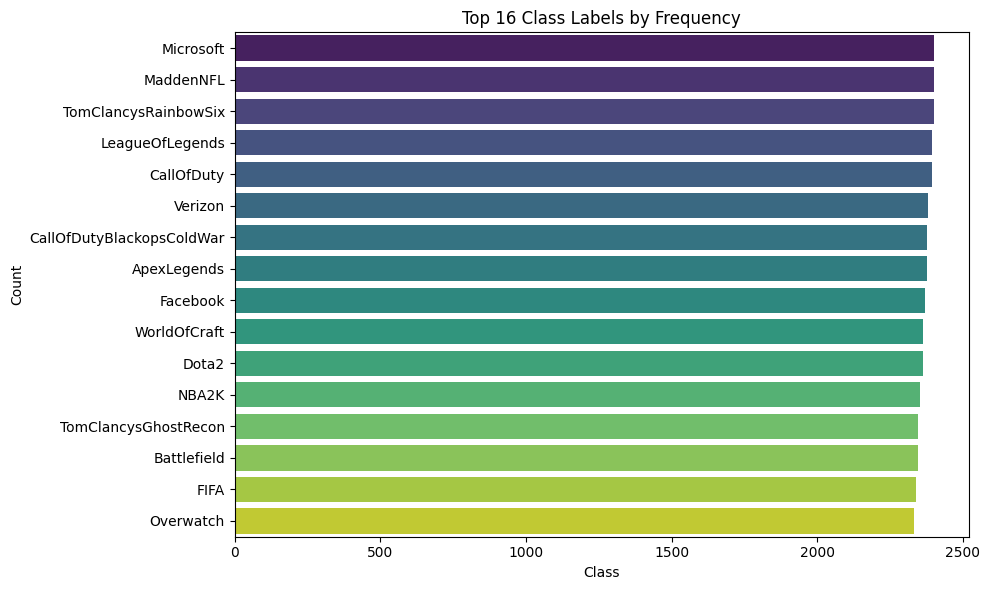

In [19]:
#Create graph to see entity distribution
label_counts = twitter_df['entity'].value_counts().nlargest(16)
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Top 16 Class Labels by Frequency')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-20-d7f5725df860>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


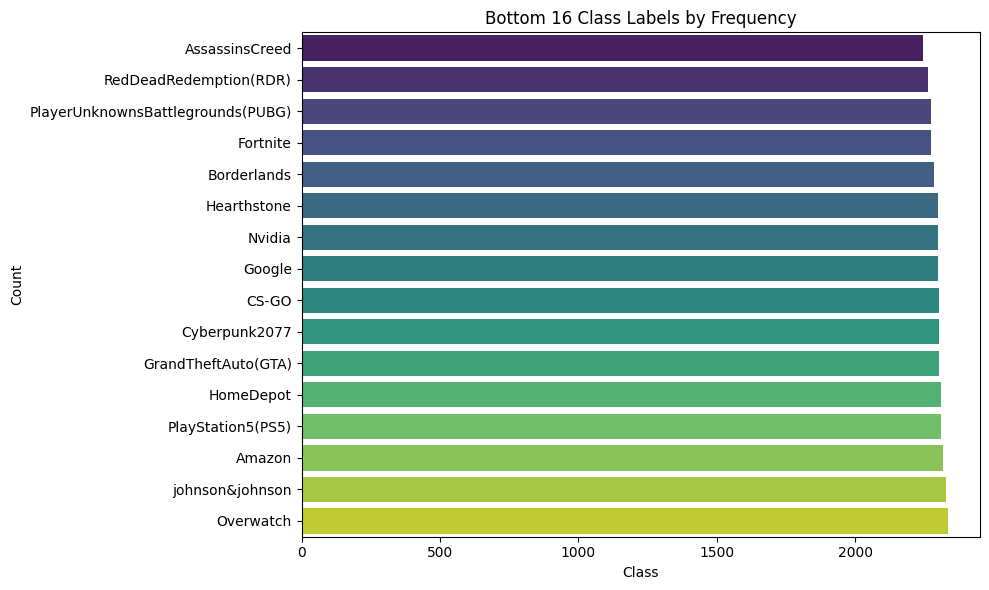

In [20]:
#Create graph to see entity distribution
label_counts = twitter_df['entity'].value_counts().nsmallest(16)
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Bottom 16 Class Labels by Frequency')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-21-69a554faee54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


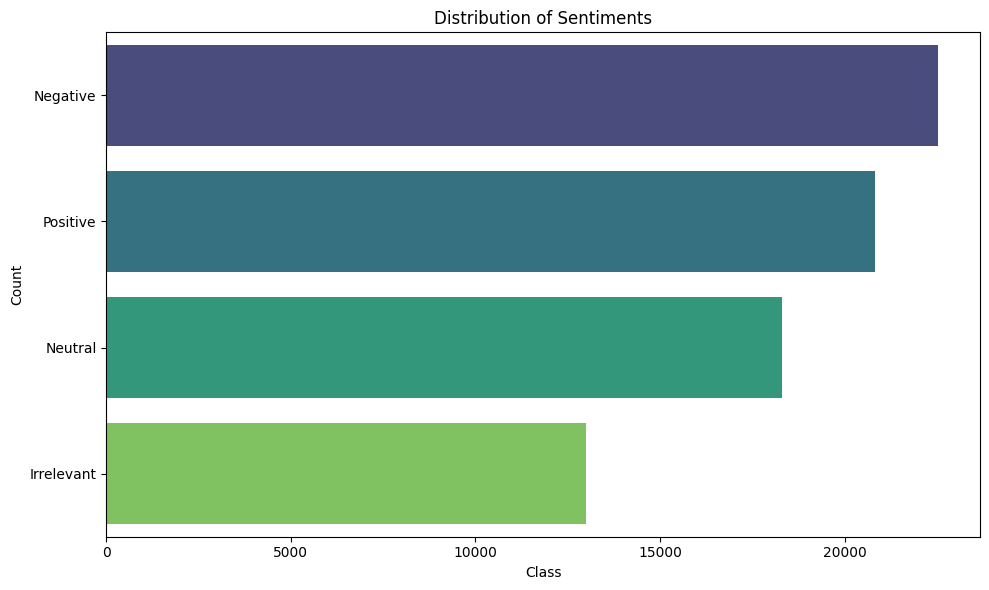

In [21]:
label_counts = twitter_df['sentiment'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

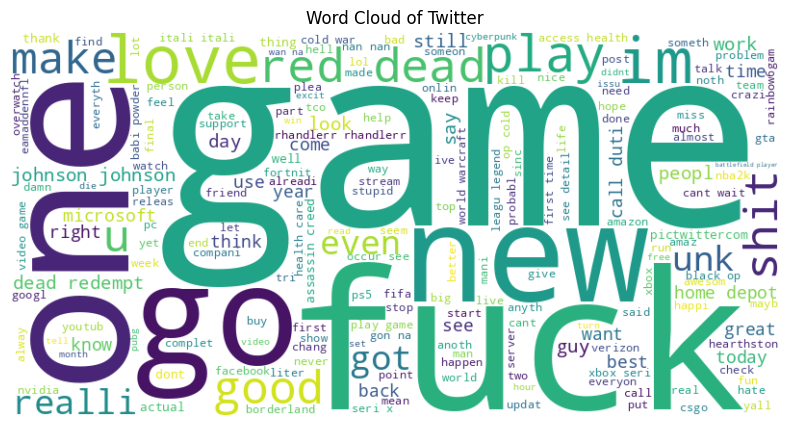

In [22]:
#Flatten list of tokens into a single list
all_tokens = list(chain.from_iterable(twitter_df['cleaned_content'].dropna()))

#Join tokens into a string
text = ' '.join(all_tokens)

#Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Plot word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Twitter")
plt.show()

In [23]:
#N-Gram Analysis
def get_top_ngrams(token_lists, n=2, top_k=20):
    all_ngrams = list(chain.from_iterable(ngrams(tokens, n) for tokens in token_lists if len(tokens) >= n))
    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_k)

<ipython-input-24-4fe2ccd0e1f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, y='bigram', x='count', palette='Blues_d')


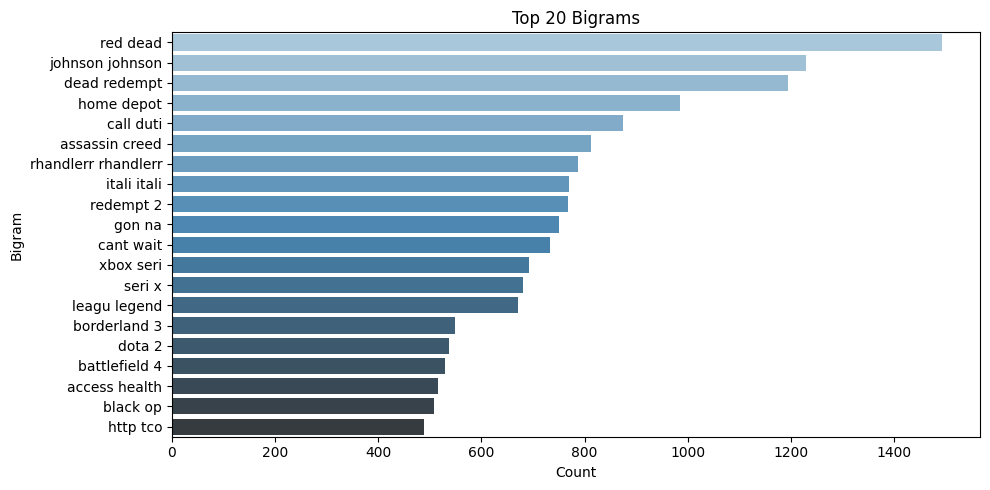

In [24]:
# Top 20 Bigrams
top_bigrams = get_top_ngrams(twitter_df['cleaned_content'], n=2, top_k=20)
bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
bigrams_df['bigram'] = bigrams_df['bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10,5))
sns.barplot(data=bigrams_df, y='bigram', x='count', palette='Blues_d')
plt.title('Top 20 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()

<ipython-input-25-5408989e7965>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trigrams_df, y='trigram', x='count', palette='Greens_d')


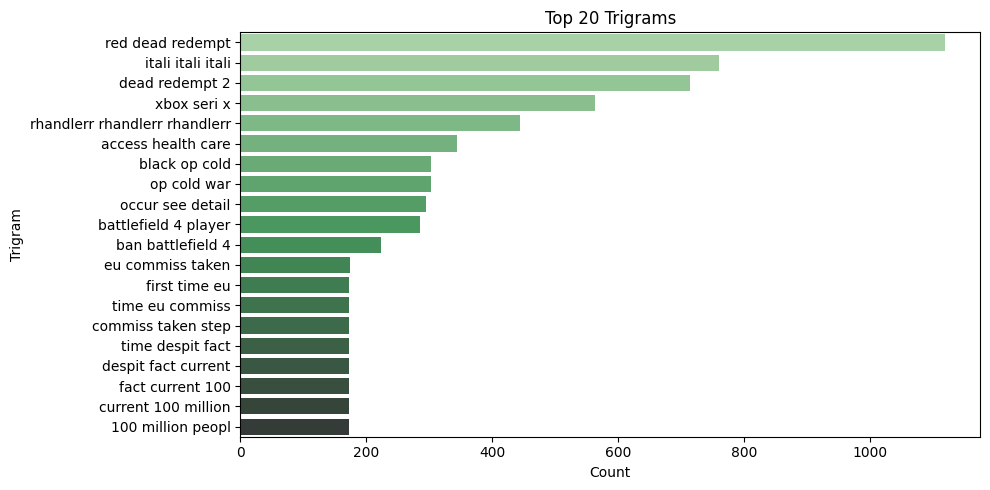

In [25]:
# -------- Top 20 Trigrams --------
top_trigrams = get_top_ngrams(twitter_df['cleaned_content'], n=3, top_k=20)
trigrams_df = pd.DataFrame(top_trigrams, columns=['trigram', 'count'])
trigrams_df['trigram'] = trigrams_df['trigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10,5))
sns.barplot(data=trigrams_df, y='trigram', x='count', palette='Greens_d')
plt.title('Top 20 Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()

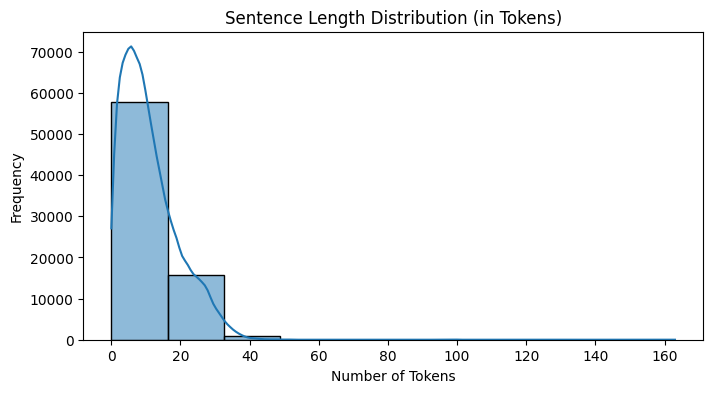

In [26]:
#Sentence Length Distribution
twitter_df['token_count'] = twitter_df['cleaned_content'].dropna().apply(len)

plt.figure(figsize=(8,4))
sns.histplot(twitter_df['token_count'], bins=10, kde=True)
plt.title('Sentence Length Distribution (in Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

## Sentiment Classification

In [7]:
#Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
twitter_df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [29]:
#Convert text to numerical mapping
sentiment_mapping = {
    "Irrelevant": 0,
    "Negative": 1,
    "Neutral": 2,
    "Positive": 3
}

twitter_df['numerical_sentiment'] = twitter_df['sentiment'].map(sentiment_mapping)

In [30]:
# Flatten token lists into strings for TF-IDF
twitter_df['text'] = twitter_df['cleaned_content'].dropna().apply(lambda tokens: ' '.join(tokens))

# Features and labels
X = twitter_df['text']
y = twitter_df['numerical_sentiment']

In [31]:
#Create the multiple models that will be trained
#We will keep the top 5000 most occurring words (max_features)
models = {
    "SVM": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", LinearSVC())
    ]),
    "NaiveBayes": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", MultinomialNB())
    ]),
    "XGBoost": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])
}

In [32]:
#Create Cross validation to take 5 folds, with stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Evaluate the models using accuracy and print their average score and std. deviation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

SVM Accuracy: 0.6985 (+/- 0.0037)
NaiveBayes Accuracy: 0.6324 (+/- 0.0027)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:51:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:52:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:53:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:56:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 0.6379 (+/- 0.0023)


In [33]:
#Perform hyperparameter tuning for SVM
#We are going to choose different types of max features
#And change the regularization parameters as well
param_grid = {
    'tfidf__max_features': [3000, 5000, 10000],
    'clf__C': [0.1, 1, 10]
}

#Evaluate the model parameters and print the best parameters and accuracy
grid = GridSearchCV(models['SVM'], param_grid, cv=cv, scoring='accuracy')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'clf__C': 10, 'tfidf__max_features': 10000}
Best CV accuracy: 0.7670524316752749


              precision    recall  f1-score   support

           0       0.70      0.56      0.62      2598
           1       0.75      0.77      0.76      4509
           2       0.64      0.66      0.65      3664
           3       0.70      0.74      0.72      4166

    accuracy                           0.70     14937
   macro avg       0.70      0.68      0.69     14937
weighted avg       0.70      0.70      0.70     14937



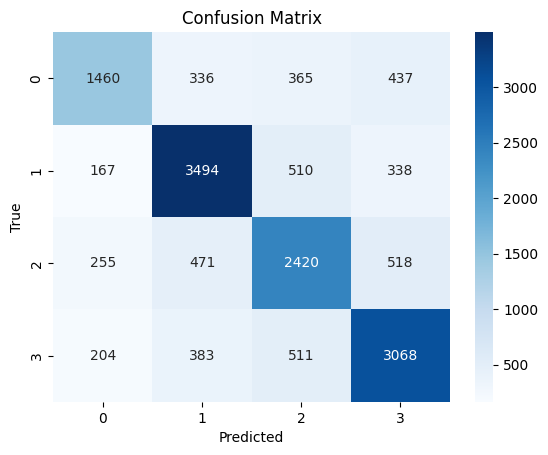

In [34]:
#Use the best model from grid search
model = grid.best_estimator_

#Train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Train SVM model
model = models['SVM']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

##Results

We can see from the initial results of the 3 base models that they performed well with the SVM model's accuracy being 0.6986 (+/- 0.0041), the NaiveBayes accuracy being 0.6325 (+/- 0.0029), and the XGBoost accuracy being 0.6380 (+/- 0.0033). This means that overall they were okay, but could use more fine tuning. Using grid search we are able to train and validate several model parameters, and found that for the SVM model clf__C = 10 and tfidf__max_features = 10000 gave us the best accuracy of 0.767. Next we can then evaluate the model using a classification report and confusion matrix. While accuracy is a good measure, the classification report allows us to break down each sentiment's precision, recall, and f1-score. We can see that these values change based on the classification label, and can be helpful if we are trying to identify a specific need or group we are most interested in.

The precision for all the groups is relatively similar, ranging from 0.64-0.75, meaning the model was able to correctly classify the sentiment of a tweet with few false positives.

The recall had a much wider range, with 0 being 0.57, and 1 being 0.78, meaning the model could not identify the true examples of irrelevant very well, compared to being able to identify the true negative sentiments much better.

Lastly, f1-score indicates the harmonic mean of precision and recall, from this we can see the model performs decent when identifying irrelevant (63%), and neutral (65%) sentiment, however is better able to identify negative (76%) and positive (72%) sentiments.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [35]:
#Store file names
train_file_path = "stsa-train.txt"
test_file_path = "stsa-test.txt"

#Read and parse file, has weird delimitation
stsa_train_data = []
with open(train_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        #If line is empty, skip
        if line:
            #split after first space
            label, text = line.split(' ', 1)
            stsa_train_data.append((int(label), text))

#Repeat read and parse for test file
stsa_test_data = []
with open(test_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            label, text = line.split(' ', 1)
            stsa_test_data.append((int(label), text))

#Create DataFrames
stsa_train_df = pd.DataFrame(stsa_train_data, columns=['label', 'text'])
stsa_test_df = pd.DataFrame(stsa_test_data, columns=['label', 'text'])

#Preview
print(stsa_train_df.head())
print(stsa_test_df.head())

   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...
   label                                               text
0      0     no movement , no yuks , not much of anything .
1      0  a gob of drivel so sickly sweet , even the eag...
2      0  gangs of new york is an unapologetic mess , wh...
3      0  we never really feel involved with the story ,...
4      1            this is one of polanski 's best films .


In [36]:
#Look at train df label distribution
stsa_train_df['label'].value_counts()

,count
label,
1,3610
0,3310


In [37]:
#Look at test df label distribution
stsa_test_df['label'].value_counts()

,count
label,
0,912
1,909


In [38]:
word_counter(stsa_test_df['text'])

Number of unique words: 7055


In [39]:
#Store train data as X and y
X = stsa_train_df['text']
y = stsa_train_df['label']

#Train/validation split 80%/20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [40]:
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Create the models using 3500 features
#Results from 5000 to 3500 appear to have minimal difference
#All scores decreased except for KNN
#We will use 5000 features
models = {
    "SVM": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", LinearSVC())
    ]),
    "KNN": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", KNeighborsClassifier())
    ]),
    "DecisionTree": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", DecisionTreeClassifier())
    ]),
    "RandomForest": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000)),
        ("clf", RandomForestClassifier(n_estimators=100))
    ])
}

In [41]:
#Run 10 fold cross validation based on accuracy for the previous models
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

SVM: Mean CV Accuracy = 0.7617, Std = 0.0124
KNN: Mean CV Accuracy = 0.5403, Std = 0.0624
DecisionTree: Mean CV Accuracy = 0.6107, Std = 0.0138
RandomForest: Mean CV Accuracy = 0.6987, Std = 0.0176


In [42]:
#SVM had best previous accuracy of all models
#We will train and fit using SVM
best_model = models['SVM']
best_model.fit(X_train, y_train)

#Create classification report
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       671
           1       0.79      0.81      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       912
           1       0.78      0.81      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

Test Accuracy: 0.7869


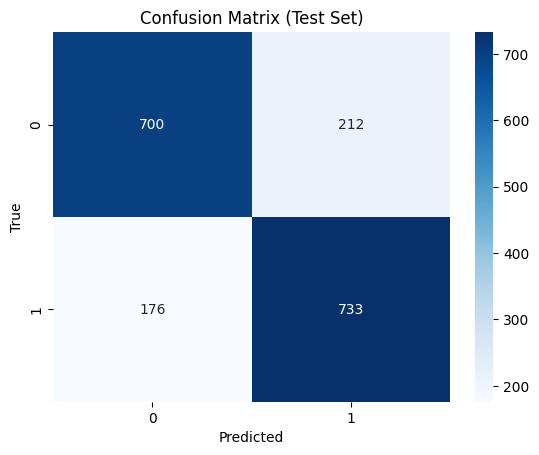

In [43]:
#Get test features and labels
X_test = stsa_test_df['text']
y_test = stsa_test_df['label']

#Use previously trained SVM model to predict Y
y_pred_test = best_model.predict(X_test)

#Return classification results
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

#Return accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [8]:
!pip install -U sentence-transformers -q

In [9]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from sentence_transformers import SentenceTransformer

In [10]:
#Load Dataframe
amazon_df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [11]:
#View columns of dataframe
amazon_df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [12]:
#View dataframe
amazon_df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [13]:
#Check numerical values and number of records
amazon_df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [14]:
#Check if null values exist
print(amazon_df['Reviews'].isnull().sum())
print(amazon_df['Rating'].isnull().sum())

70
0


In [15]:
#Drop null values
amazon_df.dropna(subset=['Reviews','Rating'],inplace = True)

In [16]:
#Check if null values still exist
print(amazon_df['Reviews'].isnull().sum())
print(amazon_df['Rating'].isnull().sum())

0
0


In [17]:
word_counter(amazon_df['Reviews'])

Number of unique words: 255061


In [18]:
#Pre-process text
amazon_df['cleaned_reviews'] = amazon_df['Reviews'].apply(preprocess_text)

In [19]:
amazon_df['joined_reviews'] = amazon_df['cleaned_reviews'].apply(lambda x: ' '.join(x))

In [20]:
word_counter(amazon_df['joined_reviews'])

Number of unique words: 111413


In [21]:
#Reduce the number of records
sample_df = amazon_df.sample(n=10000, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(sample_df['joined_reviews'])

In [22]:
#KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
sample_df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

In [23]:
#Agglomerative Clustering
X_tfidf_array = X_tfidf.toarray()
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_tfidf_array)

In [24]:
#DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)

sample_df['dbscan_cluster'] = dbscan_labels

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce TF-IDF to 2D for plotting
X_tfidf_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

# Reusable cluster plot function
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', s=10)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

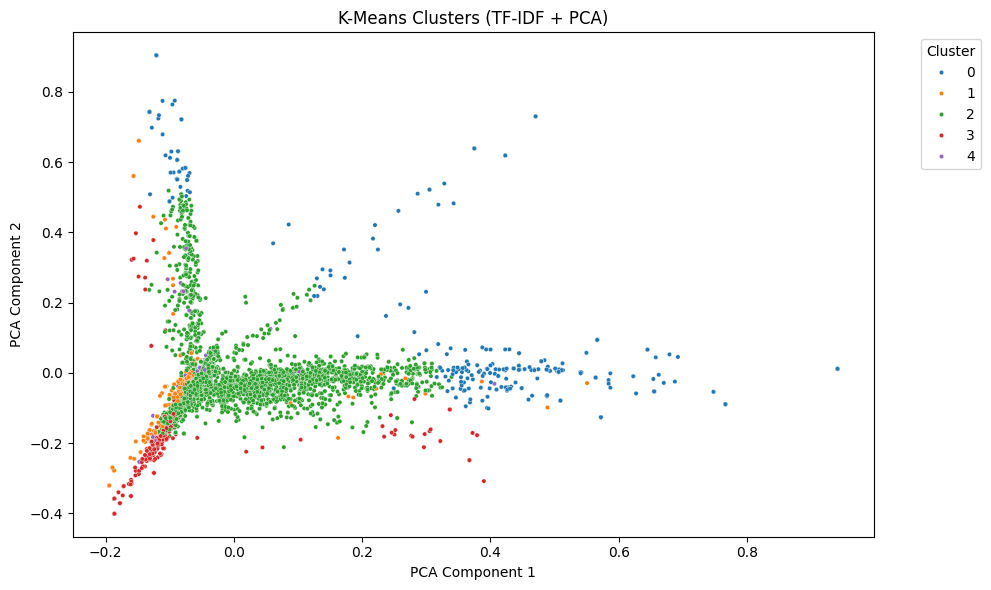

In [26]:
# KMeans
plot_clusters(X_tfidf_pca, sample_df['kmeans_cluster'], "K-Means Clusters (TF-IDF + PCA)")

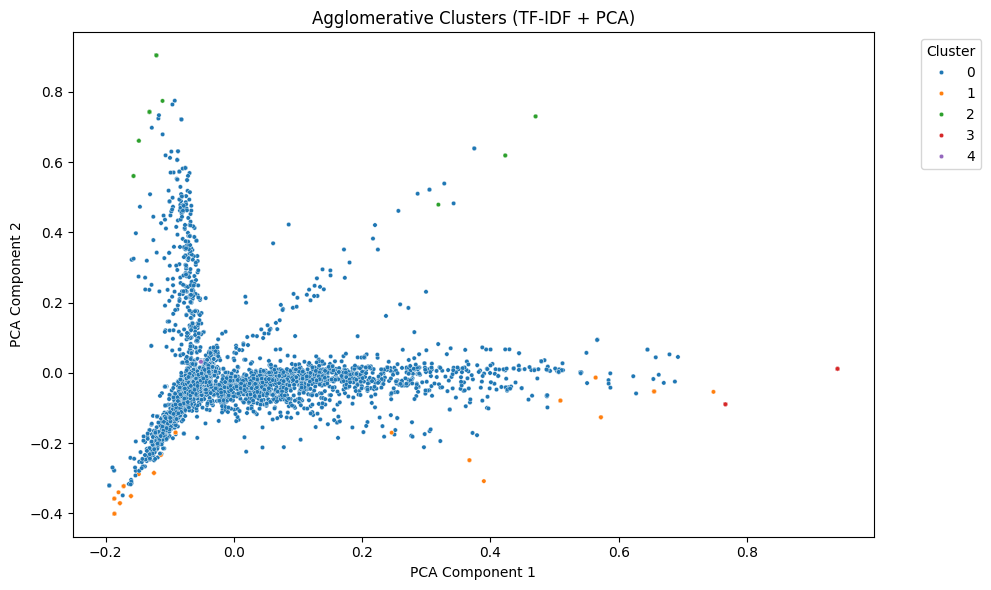

In [27]:
# Agglomerative
plot_clusters(X_tfidf_pca, agg_labels, "Agglomerative Clusters (TF-IDF + PCA)")

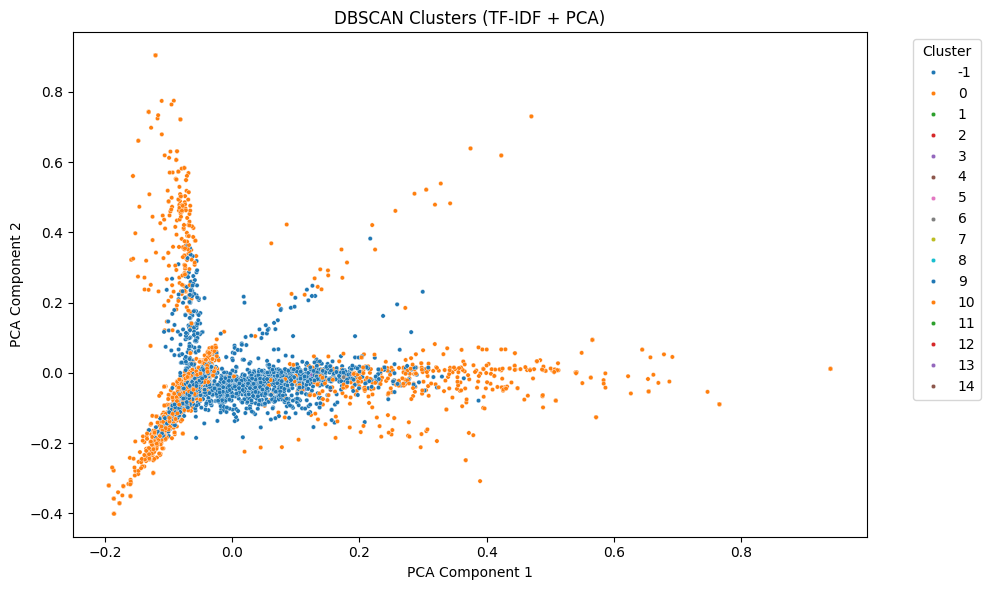

In [28]:
# DBSCAN
plot_clusters(X_tfidf_pca, sample_df['dbscan_cluster'], "DBSCAN Clusters (TF-IDF + PCA)")

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

K-means clustering, DBSCAN, and agglomerative clustering each produce distinct grouping behaviors on the TF-IDF-transformed Amazon review data. The K-means model, creates more spherical clusters and requires input the number of clusters the user wants, which created well-separated and balanced groups but may struggle with noisy, irregularly shaped data, or data very close together. DBSCAN exceled at identifying clusters where there may be outliers, and numerous amounts of clusters, which created dense pockets of similar reviews. It also created a lot of clusters, which could be hard to differentiate in the graphic. Agglomerative clustering, a hierarchical method, builds a tree of clusters and performs well on small samples by capturing nested groupings, though it can be computationally expensive and sensitive to noise. Overall, K-means gives cleaner clusters, DBSCAN highlights dense regions and noise, and agglomerative provided structure-aware groupings.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

